In [47]:
import os
import sys
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# Check HiC-Pro and HiCCUPS Output Files for Pairs and Loop Information

#### read output logs helper functions

In [2]:
def read_hiccups_loop_files(file):
    loop_data = {}
    count = 0
    with open(file) as fr:
        for line in fr:
            if not line.startswith('1'):
                continue
            else:
                info = line.strip().split()
                loop_info = info[0:6]
                loop_data[count] = loop_info
                count = count + 1
    return(loop_data)

In [3]:
def read_hicpro_stats_log(log):
    log_data = {}
    count = 0
    with open(log) as fr:
        for line in fr:
            if line.startswith('#'):
                continue
            else:
                info = line.strip().split()
                pair_info = info[0:2]
                log_data[count] = pair_info
                count = count + 1
    return(log_data)

#### generate data frame with loop and pairs info

In [4]:
loop_data = []
tpl = '/mnt/BioAdHoc/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/loops/hiccups_hicpro_chr1/{sample_name}/'
glob_str = tpl.format(sample_name='*')
for fn in glob.glob(glob_str):
    sample_name = fn.split('/')[10]
    sample_info = []
    file_path5 = os.path.join(fn, "postprocessed_pixels_5000.bedpe")
    file_path10 = os.path.join(fn, "postprocessed_pixels_10000.bedpe")
    file_path25 = os.path.join(fn, "postprocessed_pixels_25000.bedpe")
    file_path_mpairstat = "/mnt/BioAdHoc/Groups/vd-ay/hichip-db-loop-calling/results/hicpro/" + sample_name + "/hic_results/stats/" + sample_name + "/" + sample_name + ".mpairstat"
    file_path_mergestat = "/mnt/BioAdHoc/Groups/vd-ay/hichip-db-loop-calling/results/hicpro/" + sample_name + "/hic_results/stats/" + sample_name + "/" + sample_name + "_allValidPairs.mergestat"
    sample_info.append(sample_name)
    if os.path.exists(file_path_mpairstat):
        pairs_info = read_hicpro_stats_log(file_path_mpairstat)
        sample_info.append(int(pairs_info[0][1]))
    else:
        sample_info.append("None")
    if os.path.exists(file_path_mergestat):
        pairs_info = read_hicpro_stats_log(file_path_mergestat)
        sample_info.append(int(pairs_info[0][1]))
    else:
        sample_info.append("None")
    if os.path.exists(file_path5):
        loop_info = read_hiccups_loop_files(file_path5)
        sample_info.append(len(loop_info))
    else:
        sample_info.append("None")
    if os.path.exists(file_path10):
        loop_info = read_hiccups_loop_files(file_path10)
        sample_info.append(len(loop_info))
    else:
        sample_info.append("None")
    if os.path.exists(file_path25):
        loop_info = read_hiccups_loop_files(file_path25)
        sample_info.append(len(loop_info))
    else:
        sample_info.append("None")    
    loop_data.append(sample_info)
loop_df = pd.DataFrame(loop_data)
loop_df.columns = ["Sample Name", "Total Pairs Processed", "Valid Interaction Pairs", "Number of 5kb Loops (Chr1 Only)", "Number of 10kb Loops (Chr1 Only)", "Number of 25kb Loops (Chr1 Only)"]

#### sort table by Sample Name

In [5]:
loop_df = loop_df.sort_values(by=["Sample Name"], ascending=True).reset_index(drop=True)
loop_df.index += 1
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(loop_df)

,Sample Name,Total Pairs Processed,Valid Interaction Pairs,Number of 5kb Loops (Chr1 Only),Number of 10kb Loops (Chr1 Only),Number of 25kb Loops (Chr1 Only)
1,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,45904302,14233750,None,None,None
2,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1,92276625,23170231,None,None,None
3,293T.GSE128106.Homo_Sapiens.YY1.b1,247695887,24584547,None,None,0
4,AoSMC.GSE178598.Homo_Sapiens.H3K27ac.b1,337307006,191374595,295,481,509
5,BC1.GSE136090.Homo_Sapiens.H3K27ac.b1,39569105,12948113,1,2,3
6,BC3.GSE136090.Homo_Sapiens.H3K27ac.b1,38225847,9976222,None,0,1
7,BCBL1.GSE136090.Homo_Sapiens.H3K27ac.b1,50329964,17716612,2,8,28
8,EBNA2_Neg_Ramos.GSE179755.Homo_Sapiens.H3K27ac.b1,69443381,30727420,7,19,60
9,EBNA2_Plus_Ramos.GSE179755.Homo_Sapiens.H3K27a...,73912411,34665842,13,32,91
10,GM.GSE101498.Homo_Sapiens.H3K27ac.b1,332279257,104375182,441,527,414


#### sort table by Total Pairs Processed (greatest to least)

In [6]:
loop_df = loop_df.sort_values(by=["Total Pairs Processed"], ascending=False).reset_index(drop=True)
loop_df.index += 1
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(loop_df)

,Sample Name,Total Pairs Processed,Valid Interaction Pairs,Number of 5kb Loops (Chr1 Only),Number of 10kb Loops (Chr1 Only),Number of 25kb Loops (Chr1 Only)
1,MyLa.GSE151193.Homo_Sapiens.H3K27ac.b1,736804619,445931504,287,514,601
2,HCASMC.GSE101498.Homo_Sapiens.H3K27ac.b1,722202094,234954564,337,559,532
3,HAVIC.GSE154512.Homo_Sapiens.H3K27ac.b1,691966559,151539207,37,109,290
4,HaCaT_Stimulated.GSE151193.Homo_Sapiens.H3K27a...,630181138,380199595,587,754,626
5,HaCaT_Unstimulated.GSE151193.Homo_Sapiens.H3K2...,574505628,347303698,457,617,519
6,H9.GSE105028.Homo_Sapiens.Rad21.b1,515530130,145833436,2949,3259,1931
7,H9-HS.GSE105028.Homo_Sapiens.Rad21.b1,418316089,114952549,2151,2353,None
8,Naive_Tcells.GSE101498.Homo_Sapiens.CTCF.b1,364847796,134702211,69,148,228
9,AoSMC.GSE178598.Homo_Sapiens.H3K27ac.b1,337307006,191374595,295,481,509
10,HAEC.GSE178598.Homo_Sapiens.H3K27ac.b1,334543061,186439092,249,354,317


#### sort table by Valid Interaction Pairs (greatest to least)

In [7]:
loop_df = loop_df.sort_values(by=["Valid Interaction Pairs"], ascending=False).reset_index(drop=True)
loop_df.index += 1
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(loop_df)

,Sample Name,Total Pairs Processed,Valid Interaction Pairs,Number of 5kb Loops (Chr1 Only),Number of 10kb Loops (Chr1 Only),Number of 25kb Loops (Chr1 Only)
1,MyLa.GSE151193.Homo_Sapiens.H3K27ac.b1,736804619,445931504,287,514,601
2,HaCaT_Stimulated.GSE151193.Homo_Sapiens.H3K27a...,630181138,380199595,587,754,626
3,HaCaT_Unstimulated.GSE151193.Homo_Sapiens.H3K2...,574505628,347303698,457,617,519
4,HCASMC.GSE101498.Homo_Sapiens.H3K27ac.b1,722202094,234954564,337,559,532
5,AoSMC.GSE178598.Homo_Sapiens.H3K27ac.b1,337307006,191374595,295,481,509
6,HAEC.GSE178598.Homo_Sapiens.H3K27ac.b1,334543061,186439092,249,354,317
7,Treg.GSE101498.Homo_Sapiens.H3K27ac.b3,316205255,168630830,346,598,726
8,HAVIC.GSE154512.Homo_Sapiens.H3K27ac.b1,691966559,151539207,37,109,290
9,H9.GSE105028.Homo_Sapiens.Rad21.b1,515530130,145833436,2949,3259,1931
10,Naive_Tcells.GSE101498.Homo_Sapiens.CTCF.b1,364847796,134702211,69,148,228


## Plot HiCCUPS Loops versus Valid Pairs

#### give "None" entries a value of 0

In [49]:
plot_data = loop_df.copy()
plot_data.loc[:, 'Number of 5kb Loops (Chr1 Only)'] = \
    plot_data.loc[:, 'Number of 5kb Loops (Chr1 Only)'].replace('None', 0)
plot_data.loc[:, 'Number of 10kb Loops (Chr1 Only)'] = \
    plot_data.loc[:, 'Number of 10kb Loops (Chr1 Only)'].replace('None', 0)
plot_data.loc[:, 'Number of 25kb Loops (Chr1 Only)'] = \
    plot_data.loc[:, 'Number of 25kb Loops (Chr1 Only)'].replace('None', 0)

#### distrubutions of each loop type

count      66.000000
mean      203.151515
std       467.154339
min         0.000000
25%         0.000000
50%        14.500000
75%       275.500000
max      2949.000000
Name: Number of 5kb Loops (Chr1 Only), dtype: float64

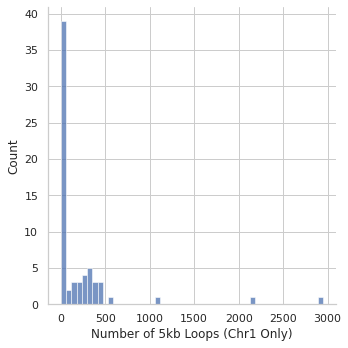

In [67]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
#fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.displot(plot_data, bins=50, x="Number of 5kb Loops (Chr1 Only)")
plot_data["Number of 5kb Loops (Chr1 Only)"].describe()

count      66.000000
mean      305.651515
std       538.279210
min         0.000000
25%         8.500000
50%        56.500000
75%       479.000000
max      3259.000000
Name: Number of 10kb Loops (Chr1 Only), dtype: float64

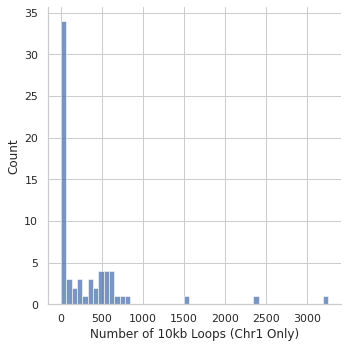

In [68]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
#fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.displot(plot_data, bins=50, x="Number of 10kb Loops (Chr1 Only)")
plot_data["Number of 10kb Loops (Chr1 Only)"].describe()

count      66.000000
mean      280.500000
std       334.371431
min         0.000000
25%        43.000000
50%       162.500000
75%       481.000000
max      1931.000000
Name: Number of 25kb Loops (Chr1 Only), dtype: float64

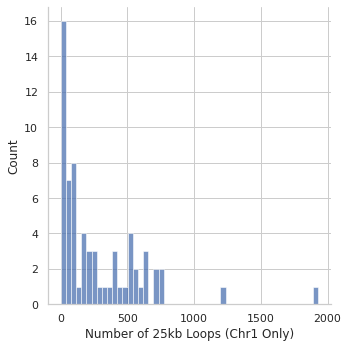

In [70]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
#fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.displot(plot_data, bins=50, x="Number of 25kb Loops (Chr1 Only)")
plot_data["Number of 25kb Loops (Chr1 Only)"].describe()

In [58]:
np.percentile(plot_data["Number of 25kb Loops (Chr1 Only)"], [5, 10, 15, 20])

array([ 0.25,  4.5 , 20.  , 31.  ])

#### plot valid interaction pairs vs. number 25kb loops

<AxesSubplot:xlabel='Valid Interaction Pairs', ylabel='Number of 25kb Loops (Chr1 Only)'>

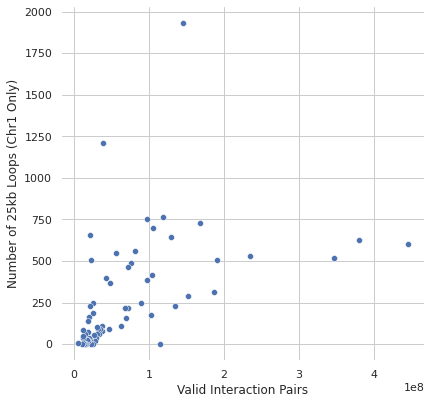

In [59]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 25kb Loops (Chr1 Only)",
                data=plot_data,
                ax=ax)

## Plotting Loops versus Valid Pairs using a Soft Threshold

In [60]:
soft_threshold = 1e8
soft_data = plot_data.loc[plot_data['Valid Interaction Pairs'] < soft_threshold]

<AxesSubplot:xlabel='Valid Interaction Pairs', ylabel='Number of 25kb Loops (Chr1 Only)'>

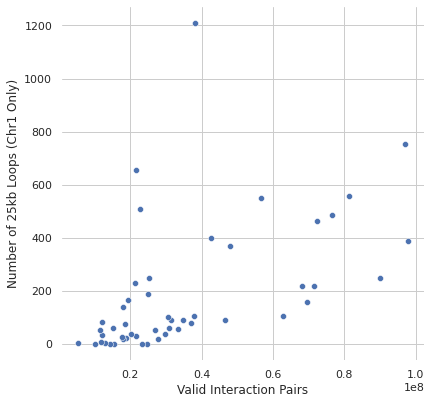

In [61]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 25kb Loops (Chr1 Only)",
                data=soft_data,
                ax=ax)

### proposed threshold: discard samples with <20 million interaction pairs OR <20 25kb HiCCUPS loops
